In [3]:
import pandas as pd
import numpy as np

## Load data

The dataset we are using is sourced from the UC Irvine Machine Learning Repository. It contains German Credit data, which classifies individuals based on a set of attributes as either good or bad credit risks. This dataset includes 1,000 instances with 20 features, and it has no missing values.
<a href=http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29>Variable description</a>

In [5]:
# specify the location to the data file
data_file = "german.data"

# define column names
var_names = [
    "a_status",            #1  Status of existing checking account
    "duration",            #2  Duration in month
    "c_history",           #3  Credit history
    "purpose",             #4  Purpose
    "c_amount",            #5  Credit amount
    "savings",             #6  Savings account/bonds
    "employment",          #7  Present employment since
    "inst_rate",           #8  Installment rate in percentage of disposable income
    "p_status",            #9  Personal status and sex
    "o_debtors",           #10 Other debtors / guarantors
    "residence",           #11 Present residence since
    "property",            #12 Property
    "age",                 #13 Age in years
    "o_inst_plans",        #14 Other isntallment plans
    "housing",             #15 Housing
    "e_credit",            #16 Number of existing credits at this bank
    "job",                 #17 Job
    "ppl_liable",          #18 Number of people being liable to provide maintenance for
    "telephone",           #19 Telephone
    "foreign",             #20 Foreign worker
    "class"               #21 Classification
]

# read from text file
df_data = pd.read_csv(data_file, sep=" ", names=var_names)
df_data2 = df_data.copy()
# examine data types
df_data.dtypes

a_status        object
duration         int64
c_history       object
purpose         object
c_amount         int64
savings         object
employment      object
inst_rate        int64
p_status        object
o_debtors       object
residence        int64
property        object
age              int64
o_inst_plans    object
housing         object
e_credit         int64
job             object
ppl_liable       int64
telephone       object
foreign         object
class            int64
dtype: object

#### <center> Numpy and Pandas data types</center>
<table border="1" class="docutils">
<colgroup>
<col width="30%">
<col width="70%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Typeclass</th>
<th class="head">Dtypes (pandas)</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">numpy.floating</span></tt></td>
<td><tt class="docutils literal"><span class="pre">float16,</span> <span class="pre">float32,</span> <span class="pre">float64,</span> <span class="pre">float128</span></tt></td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">numpy.integer</span></tt></td>
<td><tt class="docutils literal"><span class="pre">int8,</span> <span class="pre">int16,</span> <span class="pre">int32,</span> <span class="pre">int64</span></tt></td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">numpy.unsignedinteger</span></tt></td>
<td><tt class="docutils literal"><span class="pre">uint8,</span> <span class="pre">uint16,</span> <span class="pre">uint32,</span> <span class="pre">uint64</span></tt></td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">numpy.object_</span></tt></td>
<td><tt class="docutils literal"><span class="pre">object_</span></tt></td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">numpy.bool_</span></tt></td>
<td><tt class="docutils literal"><span class="pre">bool_</span></tt></td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">numpy.character</span></tt></td>
<td><tt class="docutils literal"><span class="pre">string_,</span> <span class="pre">unicode_</span></tt></td>
</tr>
</tbody>
</table>

In [3]:
# examine the top 10 rows of the data frame
df_data.head(10)

,a_status,duration,c_history,purpose,c_amount,savings,employment,inst_rate,p_status,o_debtors,...,property,age,o_inst_plans,housing,e_credit,job,ppl_liable,telephone,foreign,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## Data Exploration

Plotting the histogram to see and understand how the data is spread out, where most of the values are, how much the data varies, and any unusual points, which are important for analyzing the data and creating good models.

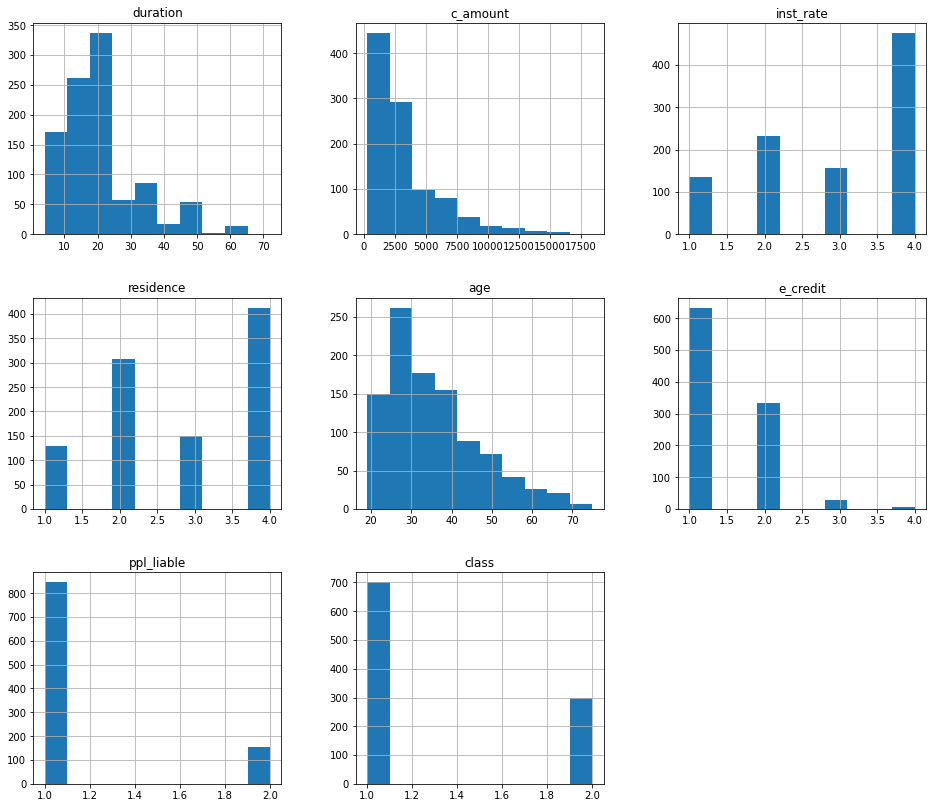

In [5]:
# produce some histograms
df_data.hist(figsize=(16, 14));

In [6]:
# produce summary statistics for numerical attributes
# produce value counts for categorical attributes

for var_name in var_names:
    print("-"*50)
    print(var_name)
    if df_data[var_name].dtype == object:
        print(df_data[var_name].value_counts())
    else:
        print(df_data[var_name].describe())

--------------------------------------------------
a_status
A14    394
A11    274
A12    269
A13     63
Name: a_status, dtype: int64
--------------------------------------------------
duration
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64
--------------------------------------------------
c_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: c_history, dtype: int64
--------------------------------------------------
purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: purpose, dtype: int64
--------------------------------------------------
c_amount
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: c_amount, dty

### Decision tree

A Decision Tree is a popular supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the value of input features, creating a tree-like model of decisions and their possible consequences.Decision Trees are a versatile and powerful tool in machine learning, known for their simplicity and ease of interpretation. However, they require careful tuning and pruning to avoid overfitting and to ensure they generalize well to new data.

In [7]:
# When you use python to do data mining, you need to encode string values to integers
from sklearn.preprocessing import LabelEncoder

# maintain a dict for string to integer mappings for each column
label_dict = dict()
for var_name in var_names:
    # only map string values
    if df_data[var_name].dtype == np.object:
        le = LabelEncoder()
        # map the string values
        df_data[var_name] = le.fit_transform(df_data[var_name])
        # store the mapping in the dict
        label_dict[var_name] = dict()
        for cls, label in zip(le.classes_, le.transform(le.classes_)):
            label_dict[var_name][label] = cls
label_dict

{'a_status': {0: 'A11', 1: 'A12', 2: 'A13', 3: 'A14'},
 'c_history': {0: 'A30', 1: 'A31', 2: 'A32', 3: 'A33', 4: 'A34'},
 'purpose': {0: 'A40',
  1: 'A41',
  2: 'A410',
  3: 'A42',
  4: 'A43',
  5: 'A44',
  6: 'A45',
  7: 'A46',
  8: 'A48',
  9: 'A49'},
 'savings': {0: 'A61', 1: 'A62', 2: 'A63', 3: 'A64', 4: 'A65'},
 'employment': {0: 'A71', 1: 'A72', 2: 'A73', 3: 'A74', 4: 'A75'},
 'p_status': {0: 'A91', 1: 'A92', 2: 'A93', 3: 'A94'},
 'o_debtors': {0: 'A101', 1: 'A102', 2: 'A103'},
 'property': {0: 'A121', 1: 'A122', 2: 'A123', 3: 'A124'},
 'o_inst_plans': {0: 'A141', 1: 'A142', 2: 'A143'},
 'housing': {0: 'A151', 1: 'A152', 2: 'A153'},
 'job': {0: 'A171', 1: 'A172', 2: 'A173', 3: 'A174'},
 'telephone': {0: 'A191', 1: 'A192'},
 'foreign': {0: 'A201', 1: 'A202'}}

#### Split dataset into train_x, train_y, test_x, and test_y

In [8]:
from sklearn.model_selection import train_test_split
attributes = [col for col in var_names if col != "class"]
train_x1, test_x1, train_y1, test_y1 = train_test_split(df_data[attributes], df_data["class"], test_size=0.3, random_state=123)

In [9]:
from sklearn import tree

algorithm = tree.DecisionTreeClassifier()
# train model
model = algorithm.fit(train_x1, train_y1)
# make prediction
pred_y = model.predict(test_x1)

# evaluate the prediction results
from sklearn.metrics import classification_report
for line in classification_report(test_y1, pred_y).split("\n"):
    print(line)

              precision    recall  f1-score   support

           1       0.77      0.77      0.77       200
           2       0.53      0.53      0.53       100

    accuracy                           0.69       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.69      0.69      0.69       300



#### Do dummy coding for categorical variables

In [10]:
for var in var_names:
    if df_data2[var].dtype == object:
        df_data2 = pd.get_dummies(df_data2, prefix=var, columns=[var], drop_first=True)
print(df_data2.dtypes)
print(df_data2.head(5))

duration             int64
c_amount             int64
inst_rate            int64
residence            int64
age                  int64
e_credit             int64
ppl_liable           int64
class                int64
a_status_A12         uint8
a_status_A13         uint8
a_status_A14         uint8
c_history_A31        uint8
c_history_A32        uint8
c_history_A33        uint8
c_history_A34        uint8
purpose_A41          uint8
purpose_A410         uint8
purpose_A42          uint8
purpose_A43          uint8
purpose_A44          uint8
purpose_A45          uint8
purpose_A46          uint8
purpose_A48          uint8
purpose_A49          uint8
savings_A62          uint8
savings_A63          uint8
savings_A64          uint8
savings_A65          uint8
employment_A72       uint8
employment_A73       uint8
employment_A74       uint8
employment_A75       uint8
p_status_A92         uint8
p_status_A93         uint8
p_status_A94         uint8
o_debtors_A102       uint8
o_debtors_A103       uint8
p

#### Standardization of continuous variables

In [ ]:
nummeric_vars = ['duration','c_amount','inst_rate', 'residence', 'age', 'e_credit']
from sklearn import preprocessing # type: ignore
df_data2[nummeric_vars] = preprocessing.StandardScaler().fit_transform(df_data2[nummeric_vars])
df_data2.head()

#### Split the data df_data2 into training and testing sets

In [11]:
attributes = [col for col in df_data2.columns if col != "class"]
train_x2, test_x2, train_y2, test_y2 = train_test_split(df_data2[attributes], df_data2["class"], test_size=0.3, random_state=123)

In [12]:
from sklearn import tree

algorithm = tree.DecisionTreeClassifier()
# train model
model = algorithm.fit(train_x2, train_y2)
# make prediction
pred_y = model.predict(test_x2)

# evaluate the prediction results
from sklearn.metrics import classification_report
for line in classification_report(test_y2, pred_y).split("\n"):
    print(line)

              precision    recall  f1-score   support

           1       0.78      0.76      0.77       200
           2       0.54      0.57      0.56       100

    accuracy                           0.70       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.70      0.70      0.70       300



#### K-nearest Neighbors

The KNN algorithm is a supervised, non-parametric method used for classification and sometimes regression. In this case, we are using it for classification. The algorithm predicts the class label of each test instance based on the most common class among its k closest neighbors from the training data. Since KNN relies on distance measurements, scaling our data is a necessary step in the preprocessing process.

In [13]:
from sklearn import neighbors
algorithm = neighbors.KNeighborsClassifier()
print(algorithm)
# train model
model = algorithm.fit(train_x2, train_y2)
# make prediction
pred_y = model.predict(test_x2)
# print evaluation measures
for line in classification_report(test_y2, pred_y).split("\n"):
    print(line)

KNeighborsClassifier()
              precision    recall  f1-score   support

           1       0.69      0.81      0.74       200
           2       0.42      0.28      0.34       100

    accuracy                           0.63       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.60      0.63      0.61       300



#### Simple Vector Machine(SVM)


Support Vector Machine (SVM) is a powerful supervised machine learning algorithm primarily used for classification tasks, but it can also be adapted for regression problems (referred to as Support Vector Regression, SVR). It is particularly effective in high-dimensional spaces and is known for its ability to handle both linear and non-linear classification. SVM works by finding a hyperplane that serves as a decision boundary to separate different classes of data. Its effectiveness in high-dimensional spaces and adaptability through kernel functions make it a popular choice in various fields of machine learning.

In [14]:
from sklearn.svm import SVC
algorithm = SVC()
print(algorithm)
# train model
model = algorithm.fit(train_x2, train_y2)
# make prediction
pred_y = model.predict(test_x2)
# print evaluation measures
for line in classification_report(test_y2, pred_y).split("\n"):
    print(line)

SVC()
              precision    recall  f1-score   support

           1       0.69      0.97      0.80       200
           2       0.67      0.12      0.20       100

    accuracy                           0.69       300
   macro avg       0.68      0.54      0.50       300
weighted avg       0.68      0.69      0.60       300



#### Random Forest
Random Forest is an ensemble learning method that constructs multiple decision trees to improve accuracy and reduce overfitting for classification and regression tasks. Each tree is trained on a different subset of the data and considers a random subset of features at each split, enhancing model diversity. The final prediction is made by averaging the results (regression) or majority voting (classification) from all the trees. This approach makes Random Forest robust, accurate, and versatile, though it is more computationally intensive than single decision trees.

from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier()
print(algorithm)
# train model
model = algorithm.fit(train_x2, train_y2)
# make prediction
pred_y = model.predict(test_x2)
# evaluate the prediction results

for line in classification_report(test_y2, pred_y).split("\n"):
    print(line)

#### Gradient boosting (xgboost)

Gradient Boosting (often implemented as XGBoost) is an ensemble learning technique that builds multiple decision trees sequentially, where each new tree corrects the errors of the previous ones. Unlike Random Forest, which builds trees independently, Gradient Boosting focuses on minimizing the residuals of the model by adding trees that target the remaining errors. XGBoost (Extreme Gradient Boosting) is a specific implementation of this method, known for its efficiency, speed, and performance through optimizations such as parallel processing and regularization. It is widely used for classification and regression tasks, particularly in competitive machine learning.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
algorithm = GradientBoostingClassifier()
print(algorithm)
model = algorithm.fit(train_x2, train_y2)
# make predictions for test data
pred_y = model.predict(test_x2)
for line in classification_report(test_y2, pred_y).split("\n"):
    print(line)